# Creating a Demand Curve

In [1]:
!pip install oauth2client
import pandas as pd
import gspread
import os
import json
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
from datascience import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


We will create a few demand curves based on the class. Start by filling in the form at https://forms.gle/LrHEoLCakuhKtM9J8!

In [2]:
# This cell loads in the data from the google form and saves it to a table called demand_table - don't worry about the code!
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_dict(json.loads(os.environ['GOOGLE_SHEETS_READONLY_KEY']), scope)
gc = gspread.authorize(creds)

url = 'https://docs.google.com/spreadsheets/d/1Qjb5_meC0gEEUCbyc77yKeSBxOL0xz9OTSrG8M7y-BI/edit?usp=sharing'

sheet = gc.open_by_url(url)
ws = sheet.worksheet('Form Responses 1')
df = pd.DataFrame(ws.get_all_records())

demand_table = Table.from_df(df)
demand_table = demand_table.drop('Timestamp')
demand_table


Masks,Burrito,GreekTix,Iphone
1,10,100,1000


Let's try graphing all our different responses!

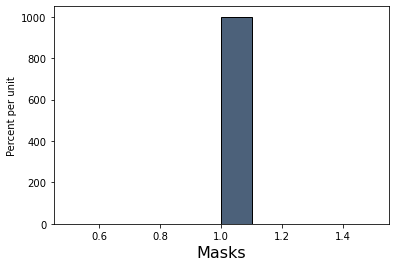

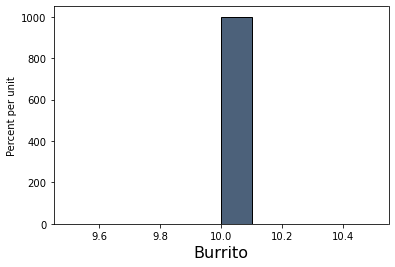

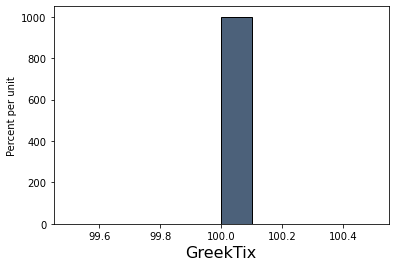

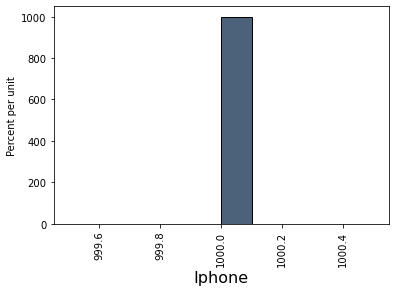

In [3]:
for i in demand_table.labels:
    demand_table.hist(i);


Let's start by looking at the demand for green tea kit kats. How many people would buy green tea kit kats at a given price? Let's assume that a person would be willing to buy the good at a price less than their bid price.  

In [4]:
# This is a column of bid values for Greeen Tea Kitkats that you've all inputted. 
masks = demand_table.select('Masks')
masks

Masks
1


In [5]:
# This cell does some python magic. You do not need to worry about what's going on. 
prices = pd.DataFrame({'price':[0.25, 0.5, 0.75, 1.00, 1.25, 1.5,1.75,2]})
MasksByPrice = masks.group("Masks")
mbp = MasksByPrice.to_df()
mask = (
    prices
    .merge(mbp, left_on='price', how='left', right_on='Masks')
    .fillna(0).drop('Masks', axis=1)
)
masks_table = Table.from_df(mask)
Q_demand = np.flip(np.cumsum(np.flip(masks_table.group("price", sum).column(1))))
masks_demand = Table().with_columns(
    'price', prices.price, 
    'quantity', Q_demand
)
masks_demand

price,quantity
0.25,1
0.5,1
0.75,1
1,1
1.25,0
1.5,0
1.75,0
2,0


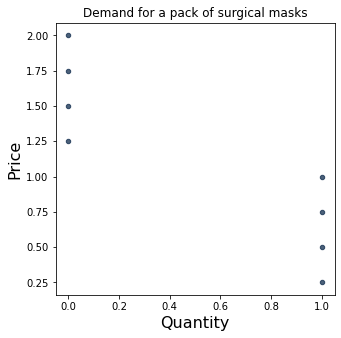

In [6]:
# Let's graph our results
masks_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for a pack of surgical masks');

Now let's find the slope and intercept of the line of best fit. The cell below defines some functions that you'll learn about in the later portions of Data 8.

In [7]:
std_units = lambda a: (a - np.mean(a)) / np.std(a)
corr = lambda x, y: np.mean(std_units(x) * std_units(y))
slope = lambda x, y: corr(x, y) * np.std(y) / np.std(x)
intercept = lambda x, y: np.mean(y) - slope(x, y) * np.mean(x)

In [8]:
slope(masks_demand["quantity"], masks_demand["price"])

-1.0

In [9]:
intercept(masks_demand["quantity"], masks_demand["price"])

1.625

We can use the same code as above to create demand curves for our other products as well!

In [10]:
#Gourmet Burrito
prices_burrito = pd.DataFrame({'price':[2.50, 5, 7.50, 10, 12.5, 15,17.5,20]})

burritos = demand_table.select('Burrito')
burritosByPrice = burritos.group("Burrito")
bbp = burritosByPrice.to_df()
gb = (
    prices_burrito
    .merge(bbp, left_on='price', how='left', right_on='Burrito')
    .fillna(0).drop('Burrito', axis=1)
)

burritos_table = Table.from_df(gb)
Q_demand_burrito = np.flip(np.cumsum(np.flip(burritos_table.group("price", sum).column(1))))

gb_demand = Table().with_columns(
    'price', prices_burrito.price, 
    'quantity', Q_demand_burrito
)

burrito_slope = slope(gb_demand["quantity"], gb_demand["price"])
burrito_intercept = intercept(gb_demand["quantity"], gb_demand["price"])
print("Slope: " + str(burrito_slope))
print("Intercept: " +  str(burrito_intercept))

Slope: -10.0
Intercept: 16.25


In [11]:
#Greek Theatre Tickets
prices_tickets = pd.DataFrame({'price':[25, 50, 75, 100, 125, 150,175,200]})

tickets = demand_table.select('GreekTix')
ticketsByPrice = tickets.group("GreekTix")
tbp = ticketsByPrice.to_df()
gt = (
    prices_tickets
    .merge(tbp, left_on='price', how='left', right_on='GreekTix')
    .fillna(0).drop('GreekTix', axis=1)
)

tickets_table = Table.from_df(gt)
Q_demand_tickets = np.flip(np.cumsum(np.flip(tickets_table.group("price", sum).column(1))))

gt_demand = Table().with_columns(
    'price', prices_tickets.price, 
    'quantity', Q_demand_tickets
)

tickets_slope = slope(gt_demand["quantity"], gt_demand["price"])
tickets_intercept = intercept(gt_demand["quantity"], gt_demand["price"])
print("Slope: " + str(tickets_slope))
print("Intercept: " +  str(tickets_intercept))


Slope: -100.0
Intercept: 162.5


In [12]:
#Iphone 14
prices_iphone = pd.DataFrame({'price':[250, 500, 750, 1000, 1250, 1500,1750,2000, 2250, 2500, 2750, 3000]})

iphones = demand_table.select('Iphone')
iphonesByPrice = iphones.group("Iphone")
ibp = iphonesByPrice.to_df()
iphone14 = (
    prices_iphone
    .merge(ibp, left_on='price', how='left', right_on="Iphone")
    .fillna(0).drop("Iphone", axis=1)
)

iphones_table = Table.from_df(iphone14)
Q_demand_iphones = np.flip(np.cumsum(np.flip(iphones_table.group("price", sum).column(1))))

iphone14_demand = Table().with_columns(
    'price', prices_iphone.price, 
    'quantity', Q_demand_iphones
)

iphones_slope = slope(iphone14_demand["quantity"], iphone14_demand["price"])
iphones_intercept = intercept(iphone14_demand["quantity"], iphone14_demand["price"])
print("Slope: " + str(iphones_slope))
print("Intercept: " +  str(iphones_intercept))

Slope: -1500.0
Intercept: 2125.0


Comparing the demand curves for our four products, what similarities or differences do you notice? In particular, think about what the slopes of the curves might reveal to us about consumer preferences. 

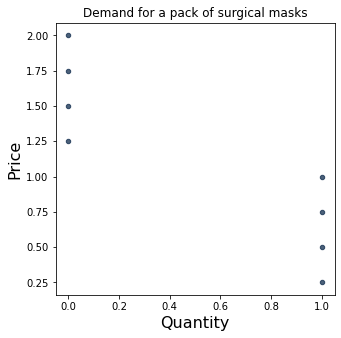

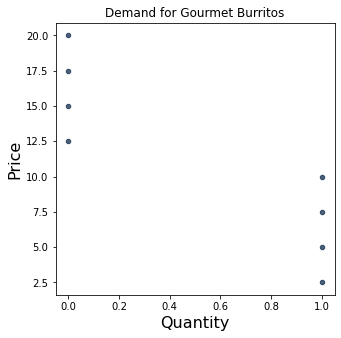

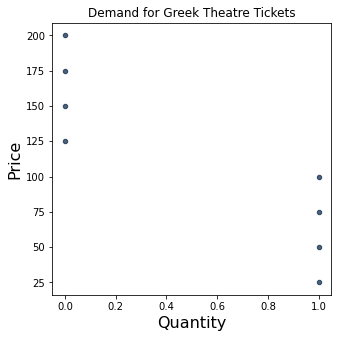

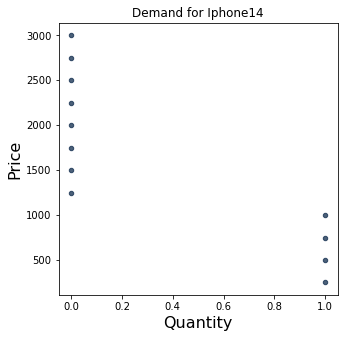

In [13]:
masks_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for a pack of surgical masks');

gb_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Gourmet Burritos');

gt_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Greek Theatre Tickets');

iphone14_demand.scatter("quantity", "price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Iphone14');